In [1]:
from __future__ import division
import numpy as np
import math
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sims = 1000
est1 = np.zeros(sims)
est2 = np.zeros(sims)
n = 100

In [3]:
for i in range(sims):
    data = np.random.geometric(0.3, n)
    est1[i] = 1/data.mean()
    est2[i] = math.sqrt(data.sum())

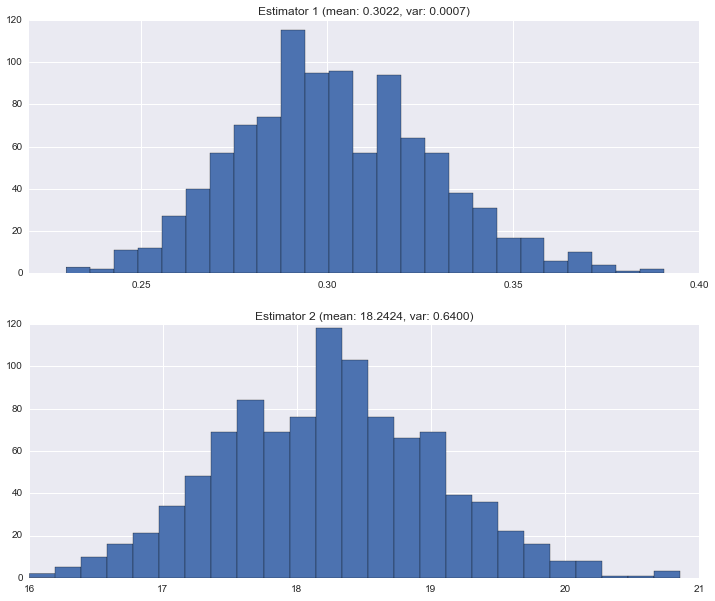

In [4]:
plt.subplot(2, 1, 1);
plt.title('Estimator 1 (mean: %.4f, var: %.4f)' % (est1.mean(), est1.var()));
plt.hist(est1, bins=25);

plt.subplot(2, 1, 2);
plt.title('Estimator 2 (mean: %.4f, var: %.4f)' % (est2.mean(), est2.var()));
plt.hist(est2, bins=25);

In [5]:
sims = 1000
n = 100

b0_1 = np.zeros(sims)
b1_1 = np.zeros(sims)
b0_2 = np.zeros(sims)
b1_2 = np.zeros(sims)

b0, b1 = 2, 3

X = np.random.uniform(-1, 1, n)
X = sm.add_constant(X) # Intercept

In [6]:
for i in range(sims):
    y1 = b0 + b1*X[:,1] + np.random.normal(0,1,n)
    model1 = sm.GLM(y1, X)
    model1_results = model1.fit()
    b0_1[i], b1_1[i] = model1_results.params
    
    y2 = b0 + b1*X[:,1] + np.random.normal(0,1,n) + X[:,1]
    model2 = sm.GLM(y2, X)
    model2_results = model2.fit()
    b0_2[i], b1_2[i] = model2_results.params

In [7]:
model1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   1.13176138738
Method:                          IRLS   Log-Likelihood:                -147.07
Date:                Mon, 02 Nov 2015   Deviance:                       110.91
Time:                        12:34:26   Pearson chi2:                     111.
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0579      0.109     18.816      0.000         1.844     2.272
x1             3.1210      0.195     16.018      0.000         2.739     3.503
==============================================================================
"""

In [8]:
model2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   1.20152392015
Method:                          IRLS   Log-Likelihood:                -150.06
Date:                Mon, 02 Nov 2015   Deviance:                       117.75
Time:                        12:34:26   Pearson chi2:                     118.
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.9612      0.113     17.404      0.000         1.740     2.182
x1             3.8218      0.201     19.037      0.000         3.428     4.215
==============================================================================
"""

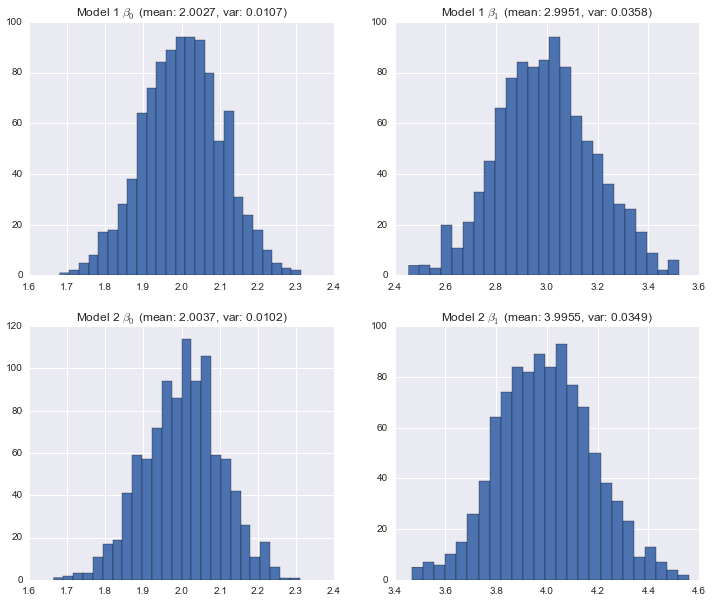

In [9]:
plt.subplot(2, 2, 1);
plt.title(r'Model 1 $\beta_0$ (mean: %.4f, var: %.4f)' % (b0_1.mean(), b0_1.var()));
plt.hist(b0_1, bins=25);

plt.subplot(2, 2, 2);
plt.title(r'Model 1 $\beta_1$ (mean: %.4f, var: %.4f)' % (b1_1.mean(), b1_1.var()));
plt.hist(b1_1, bins=25);

plt.subplot(2, 2, 3);
plt.title(r'Model 2 $\beta_0$ (mean: %.4f, var: %.4f)' % (b0_2.mean(), b0_2.var()));
plt.hist(b0_2, bins=25);

plt.subplot(2, 2, 4);
plt.title(r'Model 2 $\beta_1$ (mean: %.4f, var: %.4f)' % (b1_2.mean(), b1_2.var()));
plt.hist(b1_2, bins=25);